In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create heat map of heat related illness hospitalizations and highest/lowest median income!

## MEDIAN INCOME DATA

**Source:** https://www.laalmanac.com/employment/e

In [5]:
# read in data for median income levels
med_income = pd.read_excel(r'median income by la zip (1).xlsx')
print(med_income) 

     Zip Code                                          Community  \
0       90001   Los Angeles (South Los Angeles), Florence-Graham   
1       90002         Los Angeles (Southeast Los Angeles, Watts)   
2       90003  Los Angeles (South Los Angeles, Southeast Los ...   
3       90004  Los Angeles (Hancock Park, Rampart Village, Vi...   
4       90005  Los Angeles (Hancock Park, Koreatown, Wilshire...   
..        ...                                                ...   
276     93551                 City Ranch, Leona Valley, Palmdale   
277     93552                                           Palmdale   
278     93553                         Juniper Hills, Pearblossom   
279     93563                              Pearblossom, Valyermo   
280     93591                         Lake Los Angeles, Palmdale   

    Estimated Median Income  
0                     52806  
1                     46159  
2                     47733  
3                     54947  
4                     44913  
.. 

In [7]:
# replace the error values 

med_income["Estimated Median Income"] = med_income['Estimated Median Income'].replace('No 2021 estimate ($90,546 in 2020)', '90546')
bad_zipcode = med_income[med_income['Zip Code'] == '91046'].index
med_income.drop(bad_zipcode, inplace=True)

In [8]:
# make the data set from string to integer
med_income["Estimated Median Income"] = med_income['Estimated Median Income'].astype('int')

In [9]:
# sort data set by lowest to greatest estimated median income
sort = med_income.sort_values(by=['Estimated Median Income'], ascending=True)
sort

,Zip Code,Community,Estimated Median Income
11,90013,"Los Angeles (Downtown Central, Downtown Fashio...",22291
19,90021,"Los Angeles (Downtown Fashion District, Downto...",25364
12,90014,"Los Angeles (Downtown Historic Core, Arts Dist...",31332
49,90058,"Los Angeles (Southeast Los Angeles), Vernon",33146
6,90007,"Los Angeles (Southeast Los Angeles, Univerity ...",33222
...,...,...,...
88,90274,"Palos Verdes Estates, Rolling Hills, Rolling H...",186144
158,91011,La Cañada Flintridge,187297
61,90077,"Los Angeles (Bel Air Estates, Beverly Glen)",200625
279,93563,"Pearblossom, Valyermo",210600


In [10]:
# extract the top 16 data from the data
lowest = sort.head(16)
a_lowest = np.asarray(sort["Zip Code"].head(16))
a_lowest

array([90013, 90021, 90014, 90058, 90007, 90006, 90044, 90057, 90017,
       90813, 90005, 90037, 90002, 93534, 90011, 90059], dtype=int64)

In [11]:
# extract the highest median incomes
highest = sort.tail(16)
a_highest = np.asarray(sort["Zip Code"].tail(16))
a_highest

array([90254, 91381, 91302, 90210, 91436, 90275, 90094, 91008, 90266,
       91108, 90265, 90274, 91011, 90077, 93563, 90272], dtype=int64)

## HRI DATA

**Source:** https://sites.google.com/g.ucla.edu/uclaheatmaps/about?authuser=0

In [12]:
# heat related illness = hri 
# this data is number of excess daily visits to ER from 2008 - 2018
# for zip codes 
# read in data
hri = pd.read_excel(r'Heatmap_ziplevel_7.7.2022.xlsx')
print(hri)

      zip_code  daily_ExcessERvisit_number  daily_ExcessERvisit_rate
0        89010                           0                       0.9
1        89019                           0                       0.0
2        89060                           0                       0.0
3        89061                           0                       0.0
4        89439                           0                       0.1
...        ...                         ...                       ...
1764     96148                           0                       0.9
1765     96150                           2                       0.7
1766     96155                           0                      89.7
1767     96161                           1                       0.4
1768     97635                           0                       0.0

[1769 rows x 3 columns]


In [13]:
# create list of the lowest income zipcodes
l_lowest = a_lowest.tolist()
l_lowest

[90013,
 90021,
 90014,
 90058,
 90007,
 90006,
 90044,
 90057,
 90017,
 90813,
 90005,
 90037,
 90002,
 93534,
 90011,
 90059]

In [15]:
# test for zipcode and ER data accuracy
hri[hri['zip_code'] == 90013]

,zip_code,daily_ExcessERvisit_number,daily_ExcessERvisit_rate
16,90013,4,3.7


In [28]:
# make matching dataframe of HRI visits for LOWEST median income using for loop
hri_lowest = pd.DataFrame()
for i in l_lowest:
    hi = hri[hri['zip_code'] == i]
    hri_lowest = pd.concat([hri_lowest, hi])
    
print(hri_lowest)

     zip_code  daily_ExcessERvisit_number  daily_ExcessERvisit_rate
16      90013                           4                       3.7
24      90021                           1                       2.1
17      90014                           2                       2.9
54      90058                           1                       3.5
11      90007                           7                       1.7
10      90006                           9                       1.5
46      90044                          29                       3.3
53      90057                           9                       2.1
20      90017                           5                       2.3
171     90813                          21                       3.5
9       90005                           4                       1.1
39      90037                          17                       2.7
6       90002                          18                       3.4
817     93534                           9       

In [18]:
# create array grid (4x4) out of dataframe
zipcode = ((np.asarray(hri_lowest['zip_code'])).reshape(4,4))
ER_visits = ((np.asarray(hri_lowest['daily_ExcessERvisit_number'])).reshape(4,4))

In [19]:
# test view
ER_visits

array([[ 4,  1,  2,  1],
       [ 7,  9, 29,  9],
       [ 5, 21,  4, 17],
       [18,  9, 24, 16]], dtype=int64)

<AxesSubplot:title={'center':'Average Number of Daily Excess ER Visits (2008 - 2018) for the 16 Lowest Median Income Neighborhoods in Los Angeles'}>

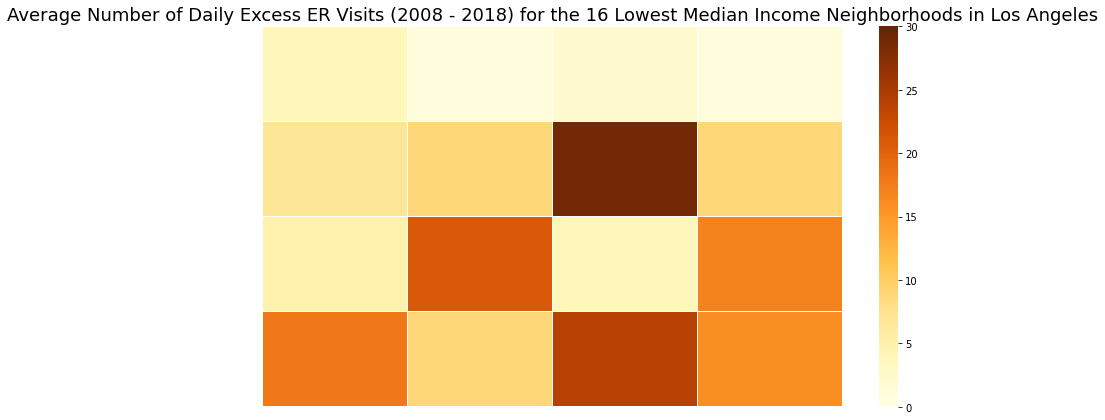

In [21]:
# create heat map using seaborns
fig, ax = plt.subplots(figsize=(13,7))
title = 'Average Number of Daily Excess ER Visits (2008 - 2018) for the 16 Lowest Median Income Neighborhoods in Los Angeles'
plt.title(title,fontsize=18)
sns.heatmap(ER_visits, fmt="", xticklabels=False, yticklabels=False, cmap='YlOrBr',linewidths=0.30,ax=ax, vmin=0, vmax = 30)


In [26]:
# create list of highest median income zipcodes
l_highest = a_highest.tolist()
l_highest

[90254,
 91381,
 91302,
 90210,
 91436,
 90275,
 90094,
 91008,
 90266,
 91108,
 90265,
 90274,
 91011,
 90077,
 93563,
 90272]

In [27]:
# make matching dataframe of HRI visits for HIGHEST median income using for loop
hri_highest = pd.DataFrame()
for i in l_highest:
    hi = hri[hri['zip_code'] == i]
    hri_highest = pd.concat([hri_highest, hi])
    
print(hri_highest)

     zip_code  daily_ExcessERvisit_number  daily_ExcessERvisit_rate
90      90254                           2                       0.8
240     91381                           3                       1.3
207     91302                           3                       1.2
74      90210                           2                       0.7
251     91436                           2                       1.5
100     90275                           4                       1.0
71      90094                           1                       1.5
179     91008                           0                       0.7
96      90266                           3                       0.9
195     91108                           1                       0.6
95      90265                           2                       1.0
99      90274                           2                       0.7
181     91011                           2                       0.9
67      90077                           1       

In [26]:
# create array grid (4x4) out of dataframe
zipcode2 = ((np.asarray(hri_highest['zip_code'])).reshape(4,4))
ER_visits2 = ((np.asarray(hri_highest['daily_ExcessERvisit_number'])).reshape(4,4))

<AxesSubplot:title={'center':'Average Number of Daily Excess ER Visits (2008 - 2018) for the 16 Highest Median Income Neighborhoods in Los Angeles'}>

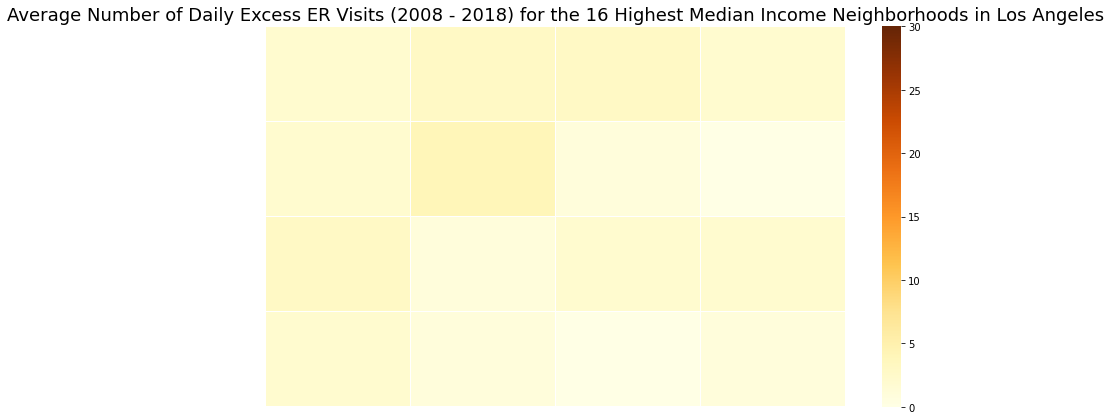

In [27]:
# create heat map using seaborns
fig, ax = plt.subplots(figsize=(13,7))
title = 'Average Number of Daily Excess ER Visits (2008 - 2018) for the 16 Highest Median Income Neighborhoods in Los Angeles'
plt.title(title,fontsize=18)
sns.heatmap(ER_visits2, xticklabels=False, yticklabels=False, fmt="",cmap='YlOrBr',linewidths=0.30,ax=ax, vmin = 0, vmax = 30)


Visualization Complete! - by Madeline Zhang :)